In [67]:
 import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-29-2020.csv')
df.head(40)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-29T12:13:10,66337,2727,28993
1,NaN,South Korea,2020-02-29T18:13:07,3150,16,27
2,Guangdong,Mainland China,2020-02-29T15:33:03,1349,7,983
3,Henan,Mainland China,2020-02-29T12:43:05,1272,21,1170
4,Zhejiang,Mainland China,2020-02-29T09:13:10,1205,1,1016
5,NaN,Italy,2020-02-29T18:03:05,1128,29,46
6,Hunan,Mainland China,2020-02-29T15:33:03,1018,4,846
7,Anhui,Mainland China,2020-02-29T05:03:13,990,6,868
8,Jiangxi,Mainland China,2020-02-29T01:23:07,935,1,811
9,Shandong,Mainland China,2020-02-29T15:33:03,756,6,421


In [11]:
final_df = df[~df['Country/Region'].str.contains("Others")] #Deleting the Cruise ship data

In [14]:
confirmed_countries = final_df.groupby('Country/Region').sum() #Grouping by country

In [66]:
top_10 = confirmed_countries.nlargest(10,'Confirmed') #Getting top 10
top_10

,Confirmed,Deaths,Recovered
Country/Region,,,
Mainland China,79251,2835,39279
South Korea,3150,16,27
Italy,1128,29,46
Iran,593,43,123
Japan,241,5,32
Singapore,102,0,72
France,100,2,12
Hong Kong,95,2,33
Germany,79,0,16


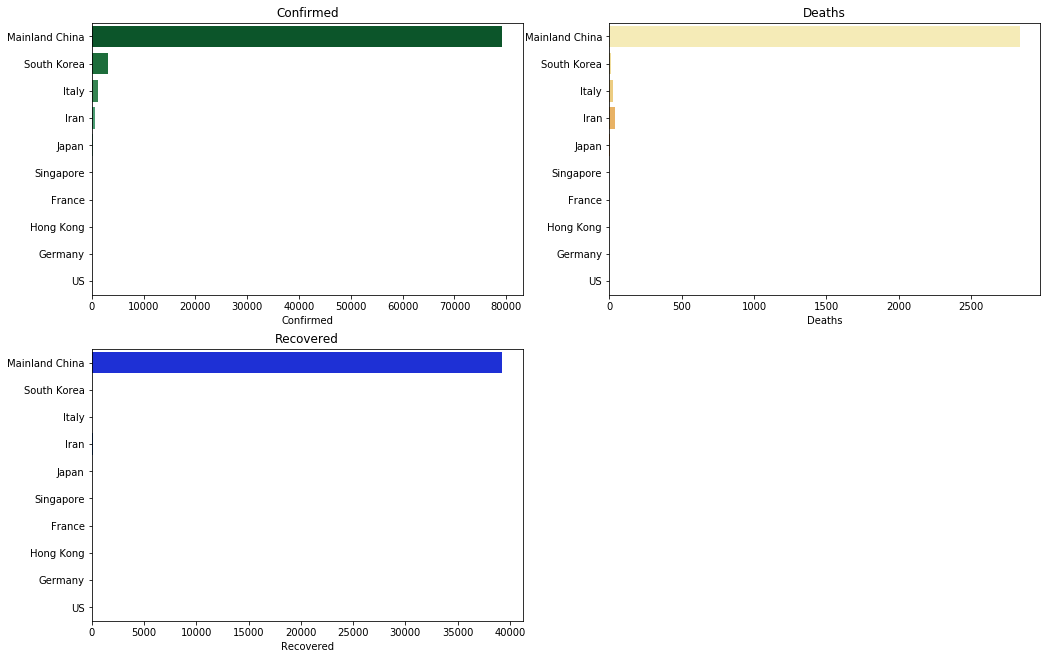

In [16]:
statuses = top_10[['Confirmed','Deaths','Recovered']] #Put statuses into a variable
list_types = statuses.index.unique().tolist() #Get Countries into a list
i= 1 #Set variable to distribute subplots
c=0 #set variable to distribute palettes
palette=['BuGn_r','YlOrRd','winter']
plt.figure(figsize=(17,17))


for status in statuses: #function to make a chart for each status
    plt.subplot(3,2,i)
    i=i+1
    sns.barplot(x =statuses[status], y=list_types,palette = palette[c])
    c=c+1
    
    plt.title(str(status))


In [21]:
china_df = final_df[final_df['Country/Region'] == 'Mainland China']


In [22]:
china_df.nlargest(10,'Confirmed')


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-29T12:13:10,66337,2727,28993
2,Guangdong,Mainland China,2020-02-29T15:33:03,1349,7,983
3,Henan,Mainland China,2020-02-29T12:43:05,1272,21,1170
4,Zhejiang,Mainland China,2020-02-29T09:13:10,1205,1,1016
6,Hunan,Mainland China,2020-02-29T15:33:03,1018,4,846
7,Anhui,Mainland China,2020-02-29T05:03:13,990,6,868
8,Jiangxi,Mainland China,2020-02-29T01:23:07,935,1,811
9,Shandong,Mainland China,2020-02-29T15:33:03,756,6,421
11,Jiangsu,Mainland China,2020-02-29T07:23:11,631,0,523
13,Chongqing,Mainland China,2020-02-29T23:13:06,576,6,438


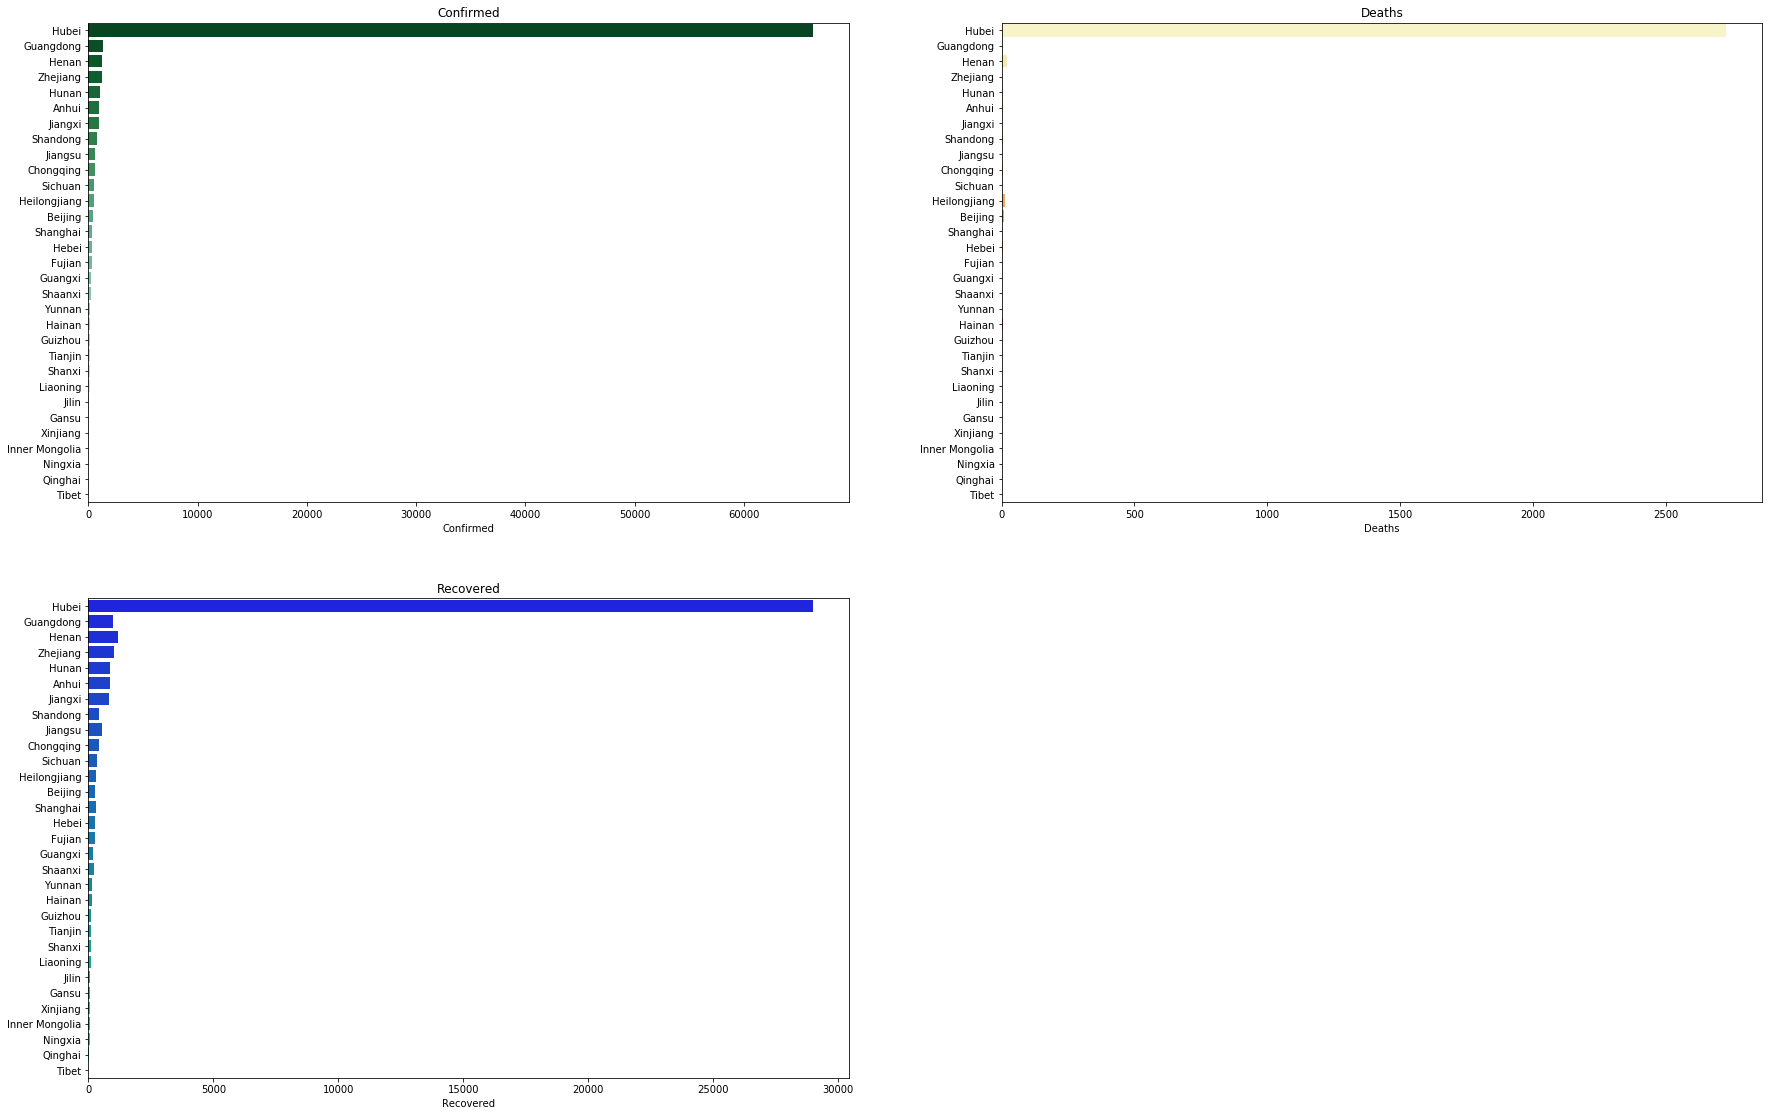

In [25]:
statuses = china_df[['Confirmed','Deaths','Recovered']] #Put statuses into a variable
list_types = china_df['Province/State'].tolist()#Get Provinces into a list
i= 1 #Set variable to distribute subplots
c=0 #set variable to distribute palettes
palette=['BuGn_r','YlOrRd','winter']
plt.figure(figsize=(30,30))


for status in statuses: #function to make a chart for each status
    plt.subplot(3,2,i)
    i=i+1
    sns.barplot(x =statuses[status], y=list_types,palette = palette[c])
    c=c+1
    
    plt.title(str(status))

In [55]:
ByCountry_df = final_df.groupby('Country/Region').sum()

In [59]:
ByCountry_df['Mortality Rate'] = (ByCountry_df['Deaths'] / ByCountry_df['Confirmed'])*100

In [60]:
ByCountry_df.nlargest(10,'Mortality Rate').reset_index() #Sort countries that have mortality rates higher than 0

,Country/Region,Confirmed,Deaths,Recovered,Mortality Rate
0,Philippines,3,1,1,33.333333
1,Iran,593,43,123,7.251265
2,Mainland China,79251,2835,39279,3.577242
3,Italy,1128,29,46,2.570922
4,Taiwan,39,1,9,2.564103
5,Hong Kong,95,2,33,2.105263
6,Japan,241,5,32,2.074689
7,France,100,2,12,2.000000
8,US,70,1,7,1.428571
9,South Korea,3150,16,27,0.507937


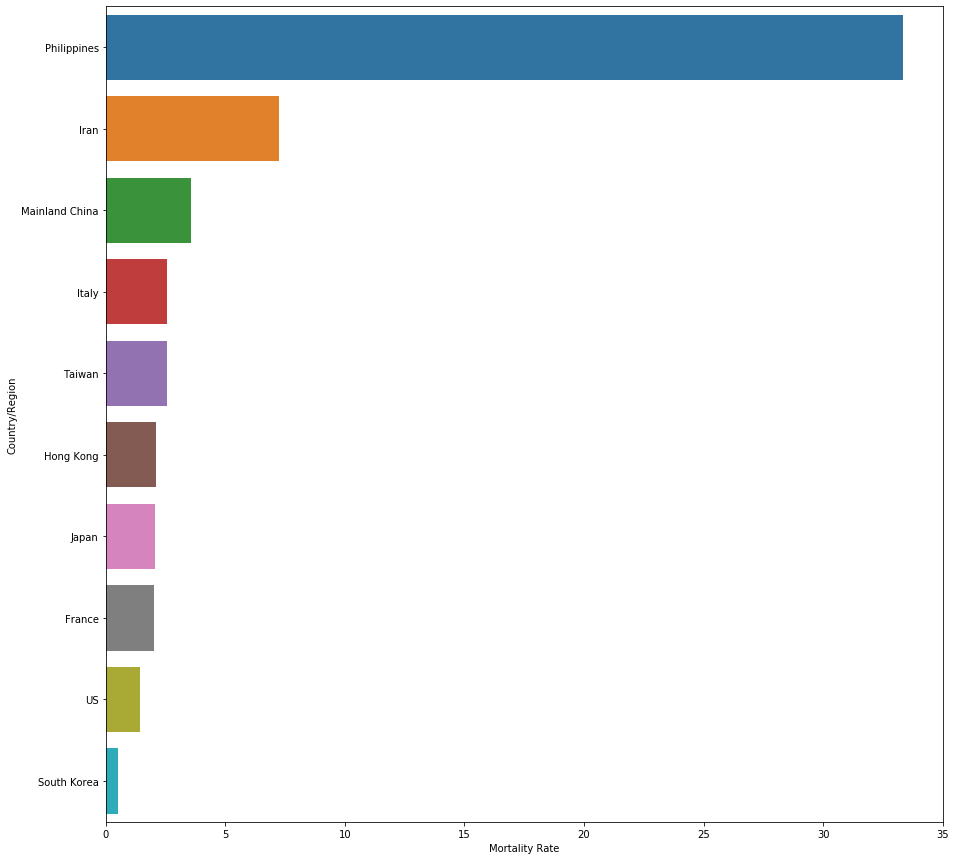

In [63]:
plt.figure(figsize=(15,15))

sns.barplot(x='Mortality Rate', y='Country/Region', data = ByCountry_df.groupby('Country/Region').sum().nlargest(10,'Mortality Rate').reset_index()) #Plot the 6 countries with deaths